In [1]:
from src.tensor import Tensor
import src.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
np.set_printoptions(suppress=True)

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
mnist_x_train, mnist_y_train = mndata.load_training()
mnist_x_test, mnist_y_test = mndata.load_testing()
x_train = Tensor(list(mnist_x_train))
x_test = Tensor(list(mnist_x_test))
y_train = Tensor(list(mnist_y_train))
y_test = Tensor(list(mnist_y_test))

In [3]:
rng = np.random.default_rng(seed=1)

# Scale down pixels from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# OneHot label vectors
def onehot(vector):
    tmp = []
    for scalar in vector.data:
        tmp2 = [1 if i==scalar else 0 for i in range(10)]
        tmp.append(tmp2)
    return Tensor(tmp)
y_train = onehot(y_train)
y_test = onehot(y_test)

print(f'x_train={x_train.shape}, y_train={y_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')

x_train=(60000, 784), y_train=(60000, 10)
x_test=(10000, 784), y_test=(10000, 10)


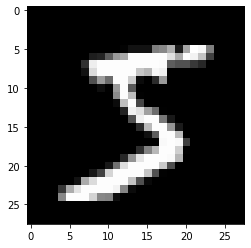

In [4]:
# Visualize X
img = np.array(x_train[0].tolist())
plt.imshow(img.reshape(28, 28),cmap='gray')
plt.show()

In [5]:
# Multinomial sampling with replacement
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * x_train.shape[0])
    batch = [draw() for _ in range(batch_size)]
    return x_train[batch], y_train[batch]

mlp = nn.MLP(inputs=784, hidden=[600, 300, 100, 50], outs=10)
losses = []

In [6]:
epochs = 1
batch_size = 100
lr = 0.005
for e in range(epochs):
    x, y = draw_batch(batch_size)
    out = mlp(x, debug=(e==0))

    loss = nn.nlll(out, y, reduction='mean')

    loss.backward()
    mlp.train(lr=lr)

    losses.append(loss.data.item())
    print(f'Epoch {e}: {loss.data.item()}')

std=9.316260660582286
std=23.52816137506638
std=16.68377264980892
std=9.884888522194084
std=6.27834046461413
Epoch 0: 10.286955851282016


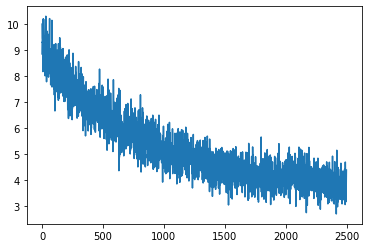

In [19]:
plt.plot(losses)
plt.show()

In [20]:
correct = 0
for i in range(len(x_test.data)):
    y = y_test[i]
    x = mlp(x_test[i])
    corr = np.argmax(y.data)
    predicted = np.argmax(x.data)
    if predicted == corr: correct += 1

print(f'Test accuracy: {(correct/len(x_test.data))*100}%')

Test accuracy: 37.44%
